<a href="https://colab.research.google.com/github/ZahraEk/OpenCV-Course/blob/main/Copy_of_basic_motion_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

import Required libraries :


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow



---


**Implementing a basic background subtractor**

To implement a basic background subtractor, let's take the following approach:
1. Start capturing frames from a camera.
2. Discard nine frames so that the camera has time to properly adjust its autoexposure to suit the lighting conditions in the scene.
3. Take the 10th frame, convert it to grayscale, blur it, and use this blurred image as the reference image of the background.
4. For each subsequent frame, blur the frame, convert it to grayscale, and compute the absolute difference between this blurred frame and the reference image of the background. Perform thresholding, smoothing, and contour detection on the differenced image. Draw and show the bounding boxes of the major contours.

More details in :[📄OpenCV_Course.pdf](https://github.com/ZahraEk/OpenCV-Course/blob/main/OpenCV_Course.pdf) | pages 5-8

---



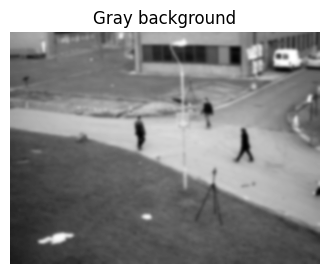


Frame 1 :



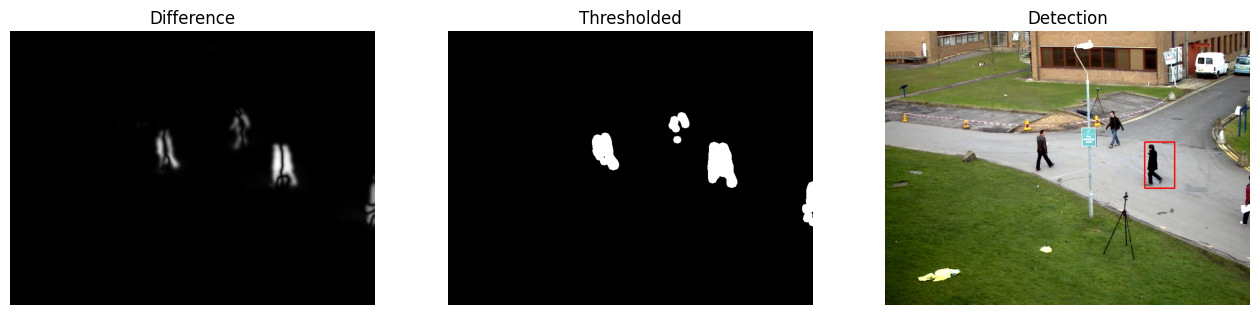


Frame 2 :



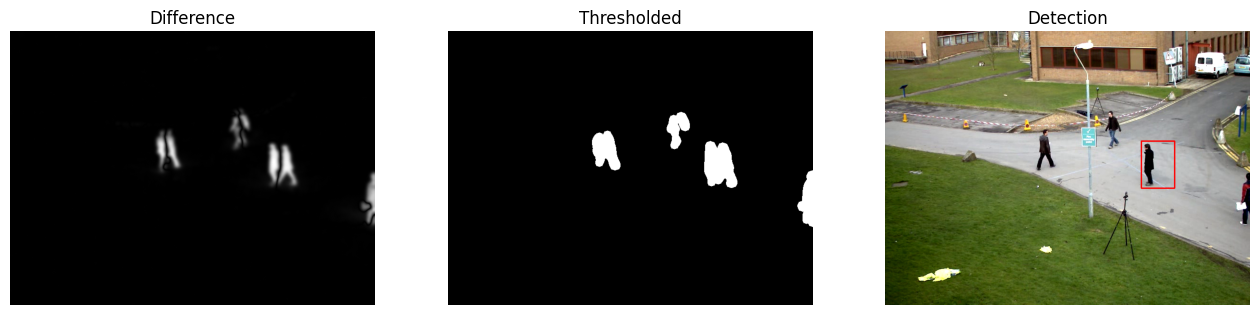


Frame 3 :



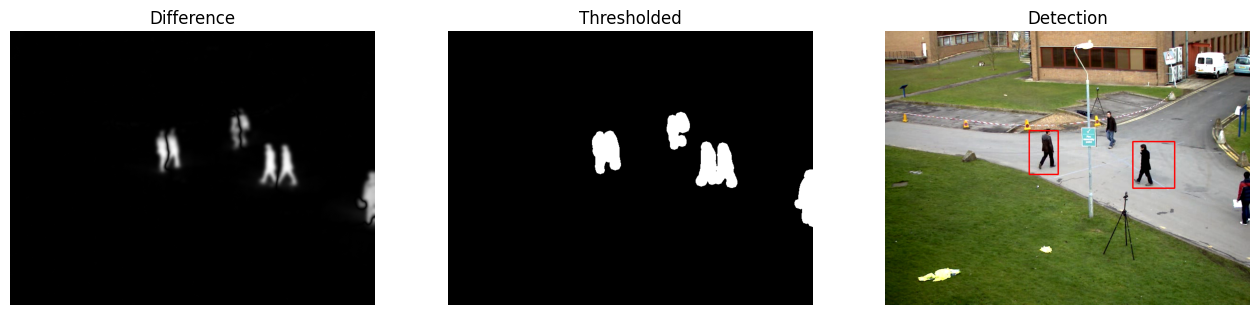


Frame 4 :



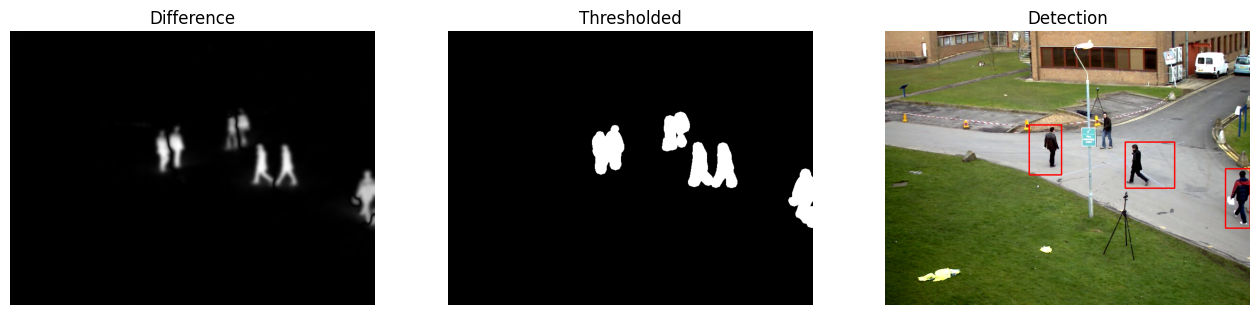


Frame 5 :



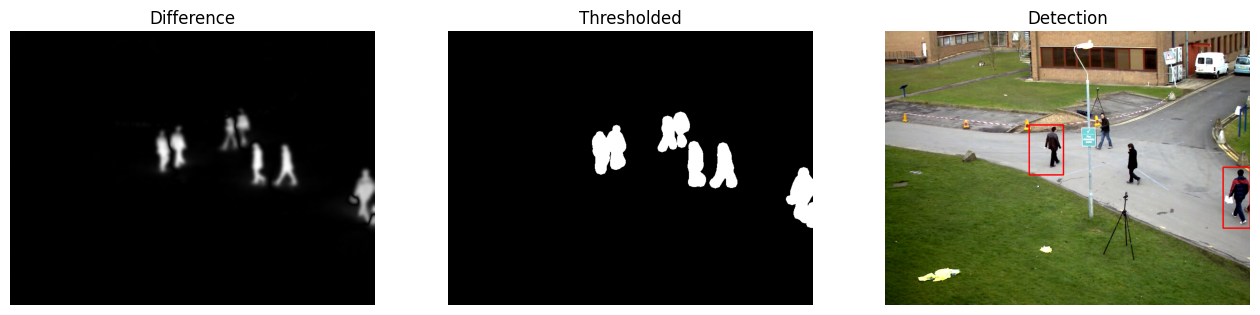

In [ ]:
# Define the blur radius and kernel sizes for erosion and dilation
BLUR_RADIUS = 21
erode_kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5))
dilate_kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (9, 9))

# Open the video file for reading
cap = cv2.VideoCapture("drive/MyDrive/pedestrians.avi")

# Capture 10 frames to allow the camera's autoexposure to adjust.
for i in range(10):
    success, frame = cap.read()
    if not success:
        exit(1)

# Convert the 10th frame to grayscale and apply Gaussian blur
gray_background = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
gray_background = cv2.GaussianBlur(gray_background, (BLUR_RADIUS, BLUR_RADIUS), 0)

# Show gray background
plt.figure(figsize = (4,4))
plt.imshow(gray_background, cmap='gray')
plt.title('Gray background')
plt.axis('off')
plt.show()

# Display the first 5 frames
for i in range(5):
    success, frame = cap.read()
    if not success:
        break

    # Convert the current frame to grayscale and apply Gaussian blur
    gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    gray_frame = cv2.GaussianBlur(gray_frame, (BLUR_RADIUS, BLUR_RADIUS), 0)

    # Calculate the absolute difference between the background and the current frame
    diff = cv2.absdiff(gray_background, gray_frame)

    # Apply thresholding to create a binary image
    _, thresh = cv2.threshold(diff, 40, 255, cv2.THRESH_BINARY)

    # Apply morphological erosion and dilation to smoothen the thresholded image
    cv2.erode(thresh, erode_kernel, thresh, iterations=2)
    cv2.dilate(thresh, dilate_kernel, thresh, iterations=2)

    # Find contours of objects in the thresholded image
    contours, hier = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Loop through detected contours and draw bounding rectangles for large ones
    for c in contours:
        if cv2.contourArea(c) > 4000:
            x, y, w, h = cv2.boundingRect(c)
            cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 0, 255), 2)

    # Create a subplot for each image and display it
    print(f"\nFrame {i+1} :\n")
    f, subplt = plt.subplots(1,3, figsize=(16,12))

    subplt[0].imshow(diff, cmap='gray')
    subplt[0].set_title('Difference')
    subplt[0].axis('off')

    subplt[1].imshow(thresh, cmap='gray')
    subplt[1].set_title('Thresholded')
    subplt[1].axis('off')

    subplt[2].imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
    subplt[2].set_title('Detection')
    subplt[2].axis('off')

    plt.show()

# Release the video capture object and close OpenCV windows
cap.release()
cv2.destroyAllWindows()


> Result in video form : [BasicDetection_pedestrians.avi](https://drive.google.com/file/d/13eDrE66dNExygCrOwXnnIr8ermk-m4FV/view?usp=sharing)
